In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile
from qiskit.transpiler.passes import Depth
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator, Aer
import numpy as np

import sys
import os

sys.path.append(os.path.abspath("..\\..\\.."))
from objects.FiveQbPerfectCode import FiveQbPerfectCodeCircuit
from functions import *

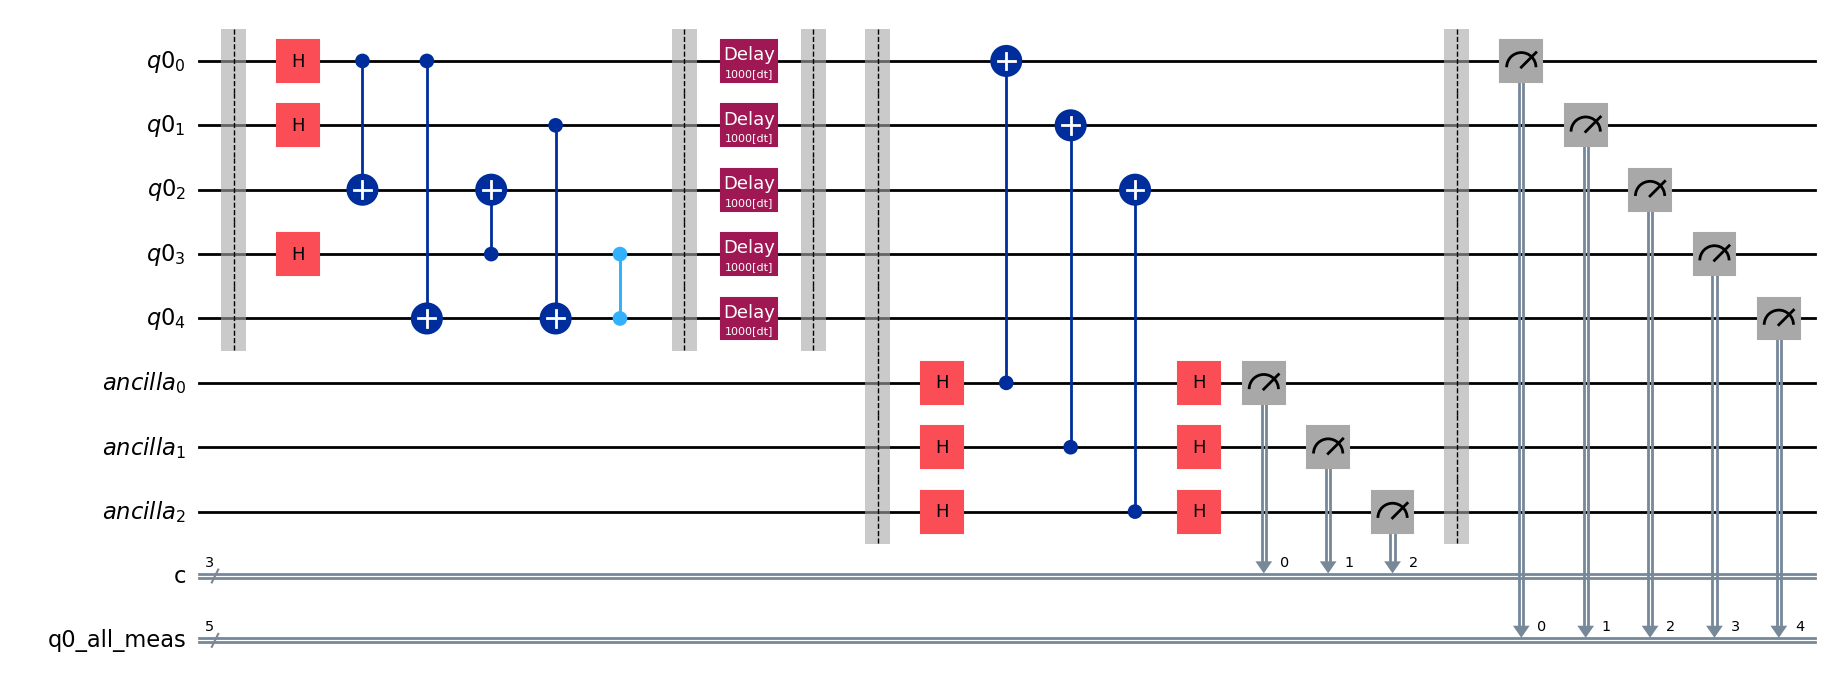

In [ ]:


def load_circuit(delay):
    qc = FiveQbPerfectCodeCircuit(1)

    qc.encode(type='0')
    
    qc.delay(delay)

    # qc.logical_measure()

    pc = qc.physical_circuit

    anc = QuantumRegister(3, 'ancilla')
    pc.add_register(anc)
    pc.barrier()

    pc.h(anc)
    pc.cx(anc[0], 0)
    pc.cx(anc[1], 1)
    pc.cx(anc[2], 2)
    pc.h(anc)

    # pc.barrier(anc)
    c = ClassicalRegister(3, 'c')
    pc.add_register(c)
    pc.measure(anc, c)

    # qc.measure_all()

    return qc

qc = load_circuit(1000)
qc.draw('mpl')



In [7]:
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)
backend = service.backend("ibm_brisbane")

In [19]:

phy_qc = qc.physical_circuit
isa_circuit = transpile(phy_qc, backend, scheduling_method="asap", optimization_level=3)
print(f"Circuit Depth: {qc.physical_circuit.depth()}")
print(f"Transpiled Circuit Depth: {isa_circuit.depth()}")
# isa_circuit.draw(output='mpl')



Circuit Depth: 11
Transpiled Circuit Depth: 38


In [20]:
dt = backend.configuration().dt * 10**9
print(f'dt = {round(dt, 3)} ns')

dt = 0.5 ns


In [21]:
t_array = [t*4_000 for t in range(0, 6)]
print([round(t*dt * 10**(-3), 3) for t in t_array])


[0.0, 2.0, 4.0, 6.0, 8.0, 10.0]


In [25]:

circuits = []

for t in t_array:

    qc = load_circuit(t)

    isa_circuit = get_transpile(qc.physical_circuit, backend, iterations=10,
                                initial_layout = [122, 121, 123, 111, 104, 124, 120]
                                )
    circuits.append(isa_circuit)

    print(f"Circuit Depth: {circuits[-1].depth()}")
    print(f"Delay Duration: {round(t*dt * 10**(-3), 3)} us")
    print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")
    print(get_layout(circuits[-1], qb_len=7))
    

Circuit Depth: 36
Delay Duration: 0.0 us
Total Duration: 8.48 us

[122, 121, 123, 111, 104, 124, 120]


C:\Users\marzu\AppData\Local\Temp\ipykernel_30932\1889652553.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 37
Delay Duration: 2.0 us
Total Duration: 10.48 us

[122, 121, 123, 111, 104, 124, 120]


C:\Users\marzu\AppData\Local\Temp\ipykernel_30932\1889652553.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 37
Delay Duration: 4.0 us
Total Duration: 12.48 us

[122, 121, 123, 111, 104, 124, 120]


C:\Users\marzu\AppData\Local\Temp\ipykernel_30932\1889652553.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 37
Delay Duration: 6.0 us
Total Duration: 14.48 us

[122, 121, 123, 111, 104, 124, 120]


C:\Users\marzu\AppData\Local\Temp\ipykernel_30932\1889652553.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 37
Delay Duration: 8.0 us
Total Duration: 16.48 us

[122, 121, 123, 111, 104, 124, 120]


C:\Users\marzu\AppData\Local\Temp\ipykernel_30932\1889652553.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


Circuit Depth: 37
Delay Duration: 10.0 us
Total Duration: 18.48 us

[122, 121, 123, 111, 104, 124, 120]


C:\Users\marzu\AppData\Local\Temp\ipykernel_30932\1889652553.py:14: DeprecationWarning: The property ``qiskit.circuit.quantumcircuit.QuantumCircuit.duration`` is deprecated as of qiskit 1.3.0. It will be removed in Qiskit 2.0.0.
  print(f"Total Duration: {round(circuits[-1].duration*dt * 10**(-3), 3)} us\n")


In [4]:
simulation_result = sampler_simulation(qc.physical_circuit, 3200)
reg = 'c'
print(f" {reg}: {simulation_result.data[reg].get_counts()}")
reg = 'q0_all_meas'
print(f" {reg}: {simulation_result.data[reg].get_counts()}")


 c: {'101': 796, '011': 817, '110': 813, '000': 774}
 q0_all_meas: {'00111': 105, '10000': 91, '00001': 96, '01110': 114, '00110': 101, '11000': 95, '11001': 105, '01001': 100, '00101': 106, '11011': 92, '10001': 92, '11100': 94, '01011': 110, '00100': 94, '10111': 86, '01101': 109, '10110': 99, '11110': 85, '10100': 104, '00010': 107, '00011': 128, '11101': 94, '01111': 101, '10010': 96, '01100': 120, '01000': 109, '11111': 96, '01010': 100, '11010': 86, '10011': 92, '10101': 97, '00000': 96}


In [5]:
print(len(simulation_result.data['q0_all_meas'].get_counts()))

32


In [26]:
test_qc = FiveQbPerfectCodeCircuit(1)

test_qc.encode(type='0')

pc = test_qc.physical_circuit

anc = QuantumRegister(3, 'ancilla')
pc.add_register(anc)

pc.h(anc)
pc.cx(anc[0], 0)
pc.cx(anc[1], 1)
pc.cx(anc[2], 2)
pc.h(anc)

statevector = statevector_simulation(test_qc.physical_circuit, qb_len=8)

anc_count = {
    '000': 0,
    '001': 0,
    '010': 0,
    '011': 0,
    '100': 0,
    '101': 0,
    '110': 0,
    '111': 0
}
for s in statevector:
    anc_count[s[-3:]] += np.abs(statevector[s])**2

print(*[f"{s}: {round(anc_count[s],2)}" for s in anc_count], sep='\n')


000: 0.25
001: 0
010: 0
011: 0.25
100: 0
101: 0.25
110: 0.25
111: 0


In [28]:
sampler = SamplerV2(backend=backend)
shots = 3200
# job = sampler.run(circuits, shots=shots)
job = service.job('cyr2qyfx46r0008rp1wg')


pub_result = job.result()


In [29]:
states = [bin(i)[2:].zfill(5) for i in range(2**5)]
anc_states = [bin(i)[2:].zfill(3) for i in range(2**3)]

results = []
ancilla_results = []
logical_meas_results = []

for i in range(len(t_array)):
    result = pub_result[i]
    
    meas = result['__value__']['data']['q0_all_meas'].get_counts()
    res = {}
    for k in states:
        k_inv = k[::-1]
        res[k] = meas[k_inv] if k_inv in meas else 0
        res[k] = res[k] / shots * 100 # %
    results.append(res)

    meas = result['__value__']['data']['c'].get_counts()
    anc = {}
    for k in anc_states:
        k_inv = k[::-1]
        anc[k] = meas[k_inv] if k_inv in meas else 0
        anc[k] = anc[k] / shots * 100 # %
    ancilla_results.append(anc)

    count = {}

    count['0'] = sum([anc[s] for s in anc_states if s.count('1') % 2 == 0])
    count['1'] = sum([anc[s] for s in anc_states if s.count('1') % 2 == 1])

    logical_meas_results.append(count)



In [30]:
for i in range(len(t_array)):
    print(logical_meas_results[i])
    print(f"TVD: {round(logical_meas_results[i]['1'], 2)}%")

{'0': 73.5625, '1': 26.4375}
TVD: 26.44%
{'0': 70.09375, '1': 29.90625}
TVD: 29.91%
{'0': 61.15625, '1': 38.84375}
TVD: 38.84%
{'0': 50.84375, '1': 49.15625}
TVD: 49.16%
{'0': 53.5625, '1': 46.4375}
TVD: 46.44%
{'0': 58.375, '1': 41.625}
TVD: 41.62%


In [31]:

delays = [round(t*dt/1000) for t in t_array]


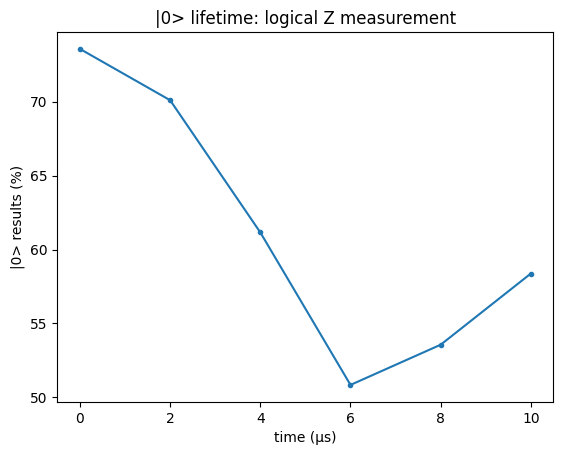

In [32]:
import matplotlib.pyplot as plt

x = delays

y = [logical_meas_results[i]['0'] for i in range(len(x))]

plt.plot(x, y, '.-')

plt.xlabel('time (μs)')
plt.ylabel('|0> results (%)')
plt.title('|0> lifetime: logical Z measurement')

plt.show()

In [33]:
# print(f" delay\t| 111\t| 000\t| other states")
print(f" delay (μs)", *[f"{s}" for s in anc_states], sep='\t ')
print("----------------------------------------------------------------------------------")
for i in range(len(t_array)):

    # print(f" > {meas}, error rate: {shots - meas['1']}%")
    print(f" {delays[i]}\t", *[round(ancilla_results[i][s]*shots/100) for s in anc_states], sep='\t ')

 delay (μs)	 000	 001	 010	 011	 100	 101	 110	 111
----------------------------------------------------------------------------------
 0		 509	 142	 196	 758	 237	 414	 673	 271
 2		 354	 175	 246	 704	 211	 379	 806	 325
 4		 254	 194	 392	 687	 238	 275	 741	 419
 6		 168	 253	 519	 613	 195	 198	 648	 606
 8		 214	 206	 495	 635	 211	 215	 650	 574
 10		 259	 220	 410	 644	 215	 277	 688	 487


TVD (ancilla results)

In [55]:
valid_states = [a for a in anc_states if a.count('1') % 2 == 0]

In [56]:
alpha = {}

for s in anc_states:
    alpha[s] = 1/len(valid_states) if s in valid_states else 0


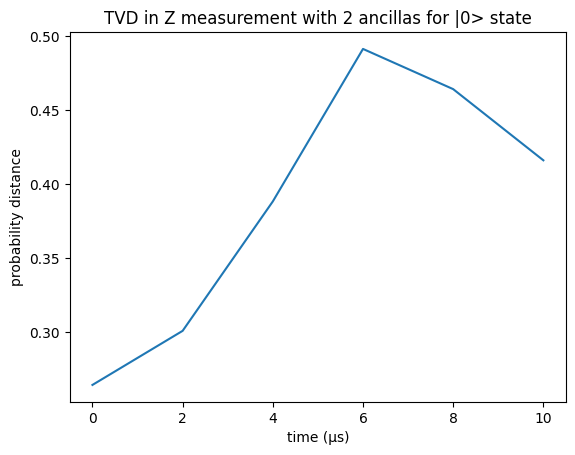

In [57]:
tvd = [sum([abs(r[s]/100 - alpha[s]) for s in anc_states])/2 for r in ancilla_results]

plt.plot(x, tvd)

# Add labels and title
plt.xlabel('time (μs)')
plt.ylabel('probability distance')
plt.title('TVD in Z measurement with 2 ancillas for |0> state')

# Display the plot
plt.show()

In [58]:
print(f"best TVD: {round(min(tvd)*100,2)}%")

best TVD: 26.44%
